In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("data/Lekagul-Sensor-Data.csv")

In [3]:
df.shape

(171477, 4)

In [4]:
df.columns

Index(['Timestamp', 'car-id', 'car-type', 'gate-name'], dtype='object')

In [5]:
df.head(10)

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
5,2015-05-01 01:24:02,20154301124328-262,4,general-gate5
6,2015-05-01 01:31:41,20153101013141-937,1,entrance3
7,2015-05-01 01:33:57,20154301124328-262,4,entrance4
8,2015-05-01 01:53:34,20153101013141-937,1,general-gate1
9,2015-05-01 01:56:20,20153101013141-937,1,ranger-stop2


In [6]:
df.dtypes

Timestamp    object
car-id       object
car-type     object
gate-name    object
dtype: object

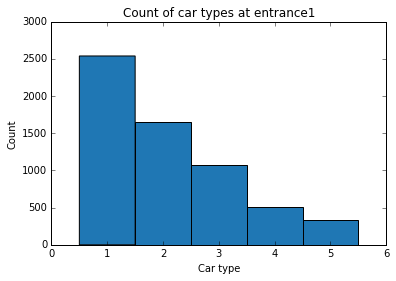

In [23]:
plt.hist(pd.to_numeric(df[df["gate-name"] == "entrance1"]["car-type"]),bins=np.arange(6)+0.5,color=np.array((31, 119, 180))/255)
plt.xlabel("Car type")
plt.ylabel("Count")
_ = plt.title("Count of car types at entrance1")

In [8]:
df.loc[df["car-type"] == '2P',["car-type"]] = '7'

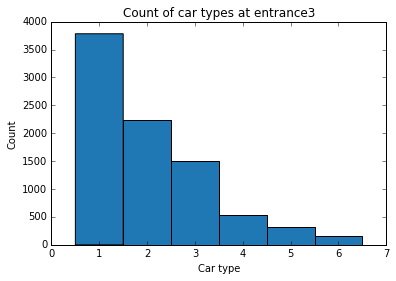

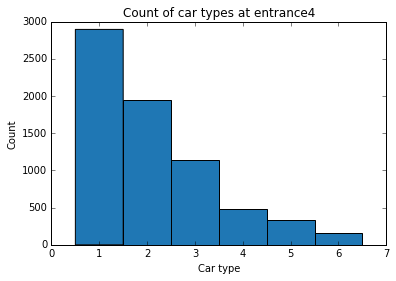

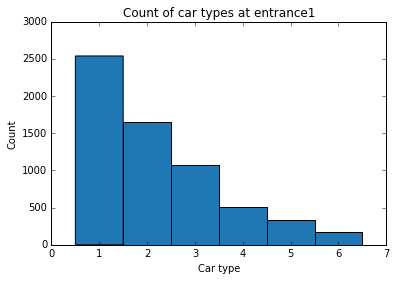

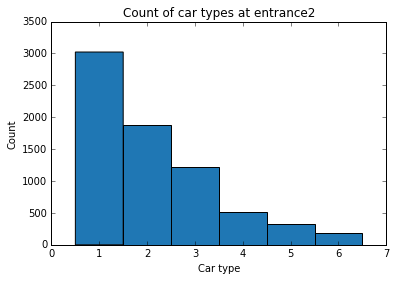

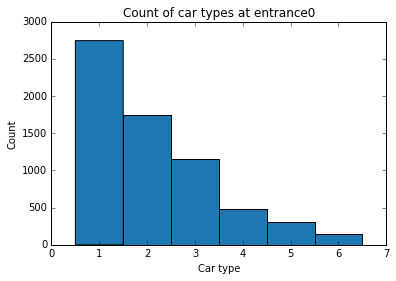

In [9]:
for gate in df["gate-name"].unique():
    if "entrance" in gate:
        plt.figure()
        plt.hist(pd.to_numeric(df[df["gate-name"] == gate]["car-type"]),bins=np.arange(7)+0.5,color=np.array((31, 119, 180))/255)
        plt.xlabel("Car type")
        plt.ylabel("Count")
        plt.title("Count of car types at {}".format(gate))

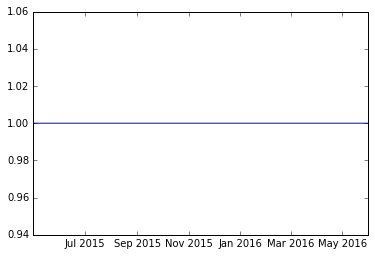

In [10]:
plt.plot(pd.to_datetime(df["Timestamp"]),np.ones(df.shape[0]))

In [11]:
g = df.groupby(pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).date)

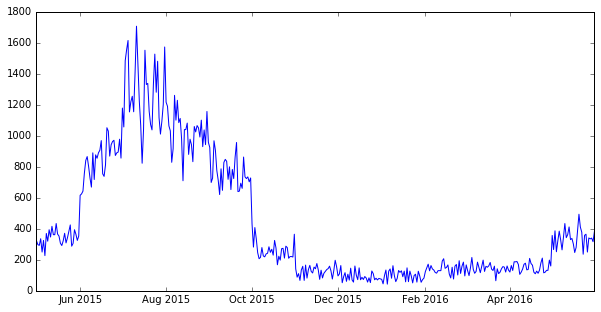

In [12]:
plt.figure(figsize=(10,5))
plt.plot(g.count().index,g.count().Timestamp)

In [13]:
g = df.groupby([pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).date,"car-type"])

In [14]:
g.count()

Timestamp  car-id  gate-name
           car-type                              
2015-05-01 1               121     121        121
           2                40      40         40
           3                40      40         40
           4                40      40         40
           5                12      12         12
           7                71      71         71
2015-05-02 1                78      78         78
           2                45      45         45
           3                66      66         66
           5                22      22         22
           6                 3       3          3
           7                84      84         84
2015-05-03 1                94      94         94
           2                56      56         56
           3                51      51         51
           4                19      19         19
           5                 6       6          6
           7                67      67         67
2015-05-04 1                79      79         79
           2                52      52         52
           3                49      49         49
           4                26      26         26
           5                 8       8          8
           6                14      14         14
           7               108     108        108
2015-05-05 1                96      96         96
           2                53      53         53
           3                29      29         29
           4                24      24         24
           7                48      48         48
...                        ...     ...        ...
2016-05-27 4                 7       7          7
           7                19      19         19
2016-05-28 1               130     130        130
           2                86      86         86
           3                46      46         46
           4                23      23         23
           5                26      26         26
           6                 4       4          4
           7                20      20         20
2016-05-29 1               119     119        119
           2                60      60         60
           3                37      37         37
           4                17      17         17
           5                29      29         29
           6                 8       8          8
           7                70      70         70
2016-05-30 1               114     114        114
           2                51      51         51
           3                14      14         14
           4                24      24         24
           5                17      17         17
           6                10      10         10
           7                87      87         87
2016-05-31 1               153     153        153
           2                72      72         72
           3                40      40         40
           4                29      29         29
           5                54      54         54
           6                 9       9          9
           7                27      27         27

[2414 rows x 3 columns]

In [15]:
g.count().Timestamp

            car-type
2015-05-01  1           121
            2            40
            3            40
            4            40
            5            12
            7            71
2015-05-02  1            78
            2            45
            3            66
            5            22
            6             3
            7            84
2015-05-03  1            94
            2            56
            3            51
            4            19
            5             6
            7            67
2015-05-04  1            79
            2            52
            3            49
            4            26
            5             8
            6            14
            7           108
2015-05-05  1            96
            2            53
            3            29
            4            24
            7            48
                       ... 
2016-05-27  4             7
            7            19
2016-05-28  1           130
            2            86

In [16]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

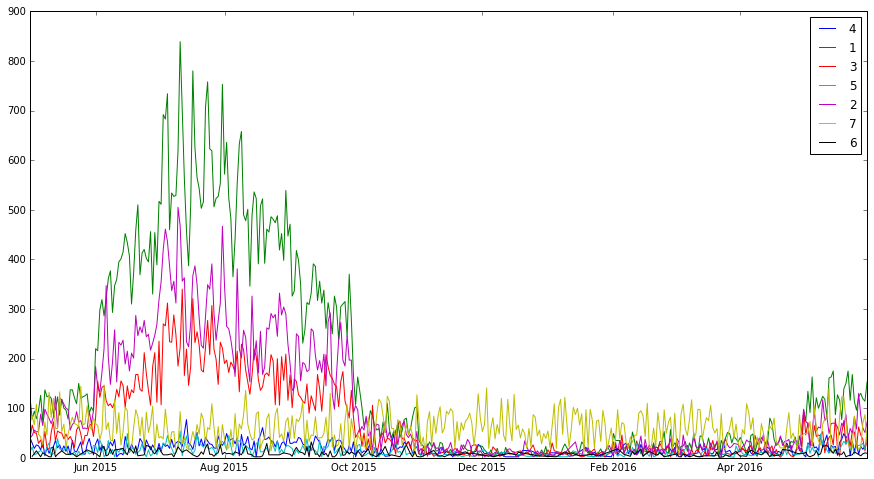

In [17]:
plt.figure(figsize=(15,8))
for car_type in df["car-type"].unique():
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).date)
    plt.plot(g.count().index,g.count().Timestamp,label=car_type)
plt.legend()

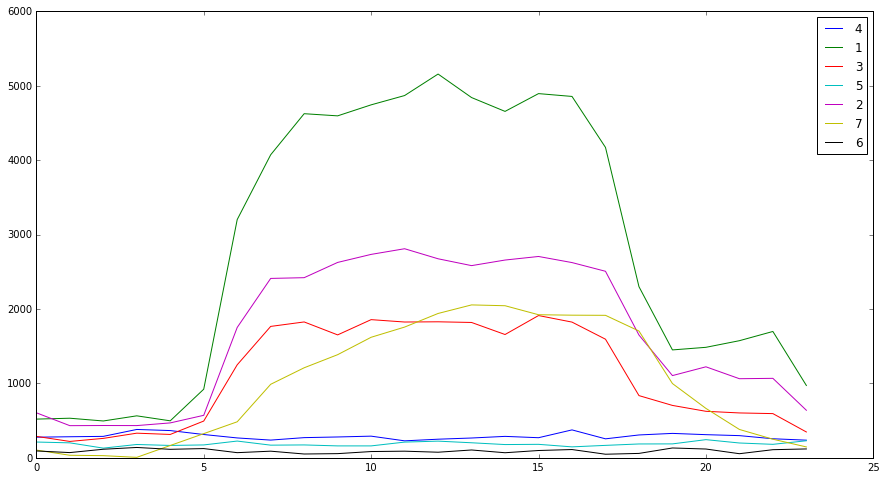

In [18]:
plt.figure(figsize=(15,8))
for car_type in df["car-type"].unique():
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).hour)
    plt.plot(g.count().index,g.count().Timestamp,label=car_type)
plt.legend()

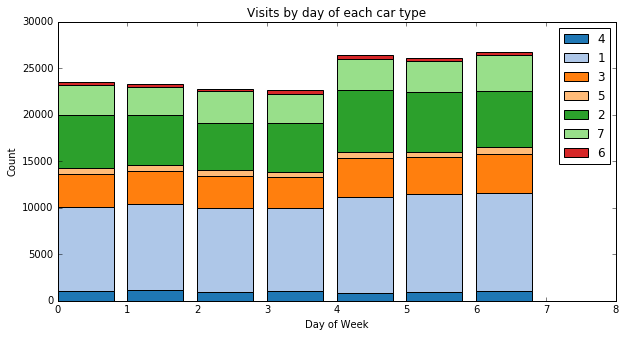

In [19]:
plt.figure(figsize=(10,5))
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
prev = np.zeros(7)
for i,car_type in enumerate(df["car-type"].unique()):
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).dayofweek)
    plt.bar(g.count().index,g.count().Timestamp,label=car_type,bottom=prev,color=np.array(tableau20[i])/255)
    # plt.bar(g.count().index,g.count().Timestamp,label=car_type,color=np.array(tableau20[i])/255)
    prev += g.count().Timestamp.values
plt.bar(np.arange(8),np.zeros(8))
plt.legend(loc="best")
plt.ylabel("Count")
plt.xlabel("Day of Week")
plt.title("Visits by day of each car type")

In [20]:
plt.bar?

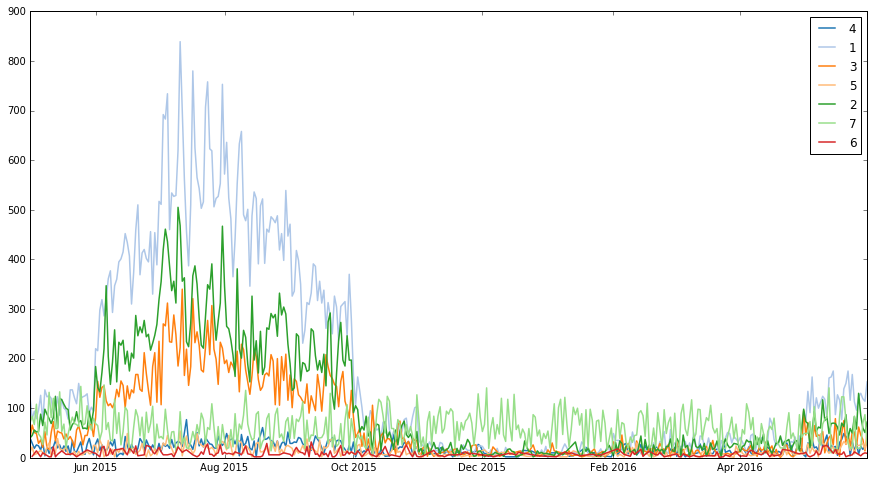

In [21]:
plt.figure(figsize=(15,8))
for i,car_type in enumerate(df["car-type"].unique()):
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).date)
    plt.plot(g.count().index,g.count().Timestamp,label=car_type,color=np.array(tableau20[i])/255,linewidth=1.5)
plt.legend()